Using the dataset for the risk of heart attack with class imbalance:

1) Create a logistic regression model and measure the performance of it.<br>
2) By experimenting with different methods and class ratios; overcome class imbalance, determine the best performing method and class ratio.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

df = pd.read_csv('cleveland-0_vs_4.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,negative
1,37,1,3,130,250,0,0,187,0,3.5,3,0,3,negative
2,41,0,2,130,204,0,2,172,0,1.4,1,0,3,negative
3,56,1,2,120,236,0,0,178,0,0.8,1,0,3,negative
4,57,0,4,120,354,0,0,163,1,0.6,1,0,3,negative


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       177 non-null    int64  
 1   sex       177 non-null    int64  
 2   cp        177 non-null    int64  
 3   trestbps  177 non-null    int64  
 4   chol      177 non-null    int64  
 5   fbs       177 non-null    int64  
 6   restecg   177 non-null    int64  
 7   thalach   177 non-null    int64  
 8   exang     177 non-null    int64  
 9   oldpeak   177 non-null    float64
 10  slope     177 non-null    int64  
 11  ca        177 non-null    object 
 12  thal      177 non-null    object 
 13  num       177 non-null    object 
dtypes: float64(1), int64(10), object(3)
memory usage: 19.5+ KB


In [3]:
for column_name in df.columns:
    print("{} unique values in column : {}".format(column_name, df[column_name].unique()))
    print("-" * 30)

age unique values in column : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 69 59 42 61 71 51 65 53 46 45
 39 47 62 34 35 29 43 55 60 67 68 74 76 70 38 40 77]
------------------------------
sex unique values in column : [1 0]
------------------------------
cp unique values in column : [1 3 2 4]
------------------------------
trestbps unique values in column : [145 130 120 140 172 110 150 135 160 105 125 142 155 104 138 128 108 134
 115 118 100 124  94 122 112 102 152 101 132 148 129 180 136 126 106 156
 170 178 146 165 114]
------------------------------
chol unique values in column : [233 250 204 236 354 192 294 263 199 239 275 266 211 283 219 340 226 234
 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245 208 321
 325 235 257 216 256 231 141 252 201 260 182 303 265 309 203 183 222 220
 209 258 227 261 221 205 240 318 298 564 277 214 248 255 207 223 288 160
 394 315 246 244 195 196 254 126 313 262 215 193 271 268 267 210 295 306
 178 242 180 228 253 342 157 168 247 264 186 2

In [4]:
df['ca'].replace({'<null>':'0'}, inplace=True)
df['ca'] = df['ca'].astype('int64') #change type from object to integer

In [5]:
df['thal'].value_counts()

3         131
7          37
6           8
<null>      1
Name: thal, dtype: int64

In [6]:
df['thal'].replace({'<null>':'3'}, inplace=True) # since 3 is a most frequent value
df['thal'] = df['thal'].astype('int64') #change type from object to integer

In [7]:
df['oldpeak'] = df['oldpeak'].astype('int64')

In [8]:
df.info() #now except for num other features are integer.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       177 non-null    int64 
 1   sex       177 non-null    int64 
 2   cp        177 non-null    int64 
 3   trestbps  177 non-null    int64 
 4   chol      177 non-null    int64 
 5   fbs       177 non-null    int64 
 6   restecg   177 non-null    int64 
 7   thalach   177 non-null    int64 
 8   exang     177 non-null    int64 
 9   oldpeak   177 non-null    int64 
 10  slope     177 non-null    int64 
 11  ca        177 non-null    int64 
 12  thal      177 non-null    int64 
 13  num       177 non-null    object
dtypes: int64(13), object(1)
memory usage: 19.5+ KB


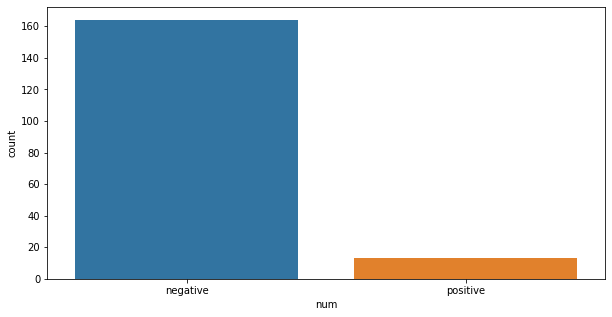

Ratio of negative: %92.66
Ratio of positive: %7.34


In [9]:
plt.figure(figsize=(10,5))
sns.countplot(x='num', data=df)
plt.show()

print("Ratio of negative: %{:.2f}".format(len(df[df['num'] == 'negative']) / len(df)*100))
print("Ratio of positive: %{:.2f}".format(len(df[df['num'] == 'positive']) / len(df)*100))

In [10]:
X = df.drop('num', axis=1)
Y = df['num']

In [11]:
X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size=0.30, random_state=42, stratify = Y)

log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, Y_train)

train_accuracy = log_reg.score(X_train, Y_train)
test_accuracy = log_reg.score(X_test, Y_test)

print('Accuracy on Train Data : {:.2f}'.format(train_accuracy), 
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')

Accuracy on Train Data : 0.99
Accuracy on Test Data  : 0.96


In [12]:
pred_train = log_reg.predict(X_train)
pred_test = log_reg.predict(X_test)

print("Train Dataset")
print(classification_report(Y_train, pred_train))
    
print("Test Dataset")
print(classification_report(Y_test, pred_test))

Train Dataset
              precision    recall  f1-score   support

    negative       0.99      1.00      1.00       114
    positive       1.00      0.89      0.94         9

    accuracy                           0.99       123
   macro avg       1.00      0.94      0.97       123
weighted avg       0.99      0.99      0.99       123

Test Dataset
              precision    recall  f1-score   support

    negative       0.96      1.00      0.98        50
    positive       1.00      0.50      0.67         4

    accuracy                           0.96        54
   macro avg       0.98      0.75      0.82        54
weighted avg       0.96      0.96      0.96        54



#RESAMPLING

In [13]:
def create_model(X, Y):
    X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size=0.20, random_state=111, stratify = Y)
    
    logreg_model = LogisticRegression()
    logreg_model.fit(X_train, Y_train)

    pred_train = logreg_model.predict(X_train)
    pred_test = logreg_model.predict(X_test)
    
    conf_mtx_train = confusion_matrix(Y_train, pred_train)
    conf_mtx_test = confusion_matrix(Y_test, pred_test)
    
    print("Accuracy : {}\n".format(logreg_model.score(X_test, Y_test)))
    
    print("Train Dataset")
    print(classification_report(Y_train, pred_train))
    
    print("Test Dataset")
    print(classification_report(Y_test, pred_test))

In [14]:
positive = df[df['num'] == 'positive']
negative = df[df['num'] == 'negative']

In [15]:
#UP-SAMPLING
positive_upsampled = resample(positive,
                              replace = True,
                              n_samples = len(negative),
                              random_state = 42)

upsampled_df = pd.concat([negative, positive_upsampled])
upsampled_df['num'].value_counts()

negative    164
positive    164
Name: num, dtype: int64

In [16]:
X = upsampled_df.drop('num', axis=1)
Y = upsampled_df['num']

create_model(X,Y)

Accuracy : 0.9696969696969697

Train Dataset
              precision    recall  f1-score   support

    negative       1.00      0.94      0.97       131
    positive       0.94      1.00      0.97       131

    accuracy                           0.97       262
   macro avg       0.97      0.97      0.97       262
weighted avg       0.97      0.97      0.97       262

Test Dataset
              precision    recall  f1-score   support

    negative       1.00      0.94      0.97        33
    positive       0.94      1.00      0.97        33

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [17]:
#DOWN-SAMPLING

negative_downsampled = resample(negative,
                                replace=True,
                                n_samples=len(positive),
                                random_state=42)

downsampled_df = pd.concat([negative_downsampled, positive])
downsampled_df['num'].value_counts()

positive    13
negative    13
Name: num, dtype: int64

In [18]:
X = downsampled_df.drop('num', axis=1)
Y = downsampled_df['num']

create_model(X,Y)

Accuracy : 0.8333333333333334

Train Dataset
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00        10
    positive       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Test Dataset
              precision    recall  f1-score   support

    negative       1.00      0.67      0.80         3
    positive       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [19]:
#SMOTE

Y = df.num
X = df.drop('num', axis=1)

sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_smote, Y_smote = sm.fit_sample(X, Y)

create_model(X_smote, Y_smote)


Accuracy : 0.9696969696969697

Train Dataset
              precision    recall  f1-score   support

    negative       0.94      0.91      0.93       131
    positive       0.91      0.95      0.93       131

    accuracy                           0.93       262
   macro avg       0.93      0.93      0.93       262
weighted avg       0.93      0.93      0.93       262

Test Dataset
              precision    recall  f1-score   support

    negative       1.00      0.94      0.97        33
    positive       0.94      1.00      0.97        33

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [20]:
#ADASYN

Y = df.num
X = df.drop('num', axis=1)

ad = ADASYN()
X_adasyn, Y_adasyn = ad.fit_sample(X, Y)

create_model(X_adasyn, Y_adasyn)

Accuracy : 0.9090909090909091

Train Dataset
              precision    recall  f1-score   support

    negative       0.95      0.92      0.94       131
    positive       0.93      0.95      0.94       132

    accuracy                           0.94       263
   macro avg       0.94      0.94      0.94       263
weighted avg       0.94      0.94      0.94       263

Test Dataset
              precision    recall  f1-score   support

    negative       0.97      0.85      0.90        33
    positive       0.86      0.97      0.91        33

    accuracy                           0.91        66
   macro avg       0.92      0.91      0.91        66
weighted avg       0.92      0.91      0.91        66



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Both Up-Sampling and Smote gave the same result.